In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("Titanic.csv")
df.head()
df.info()
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
       PassengerId    Survived      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    0.363636    2.265550   30.272590    0.44

In [8]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [13]:
#select_dtype()
#بنصنف بيهم الاعمده  ل ارقام و حروف 

numerical_col=df.select_dtypes(include=[np.number]).columns
for col in numerical_col:
     if df[col].isnull().sum() > 0:
        df[col]= df[col].fillna(df[col].mean())

categorical_col=df.select_dtypes(include=[object]).columns
for col in categorical_col:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])
        
print(df.isnull().sum())     


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [15]:
duplicate_Rows=df[df.duplicated()]
df=df.drop_duplicates()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Cabin        418 non-null    object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None


In [17]:
#extract  first letter and treat missing value in cabin  and put it in new column

df['Cabin_Letter'] = df['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'Missing')

print(df['Cabin_Letter'].value_counts())


Cabin_Letter
B    345
C     35
D     13
E      9
F      8
A      7
G      1
Name: count, dtype: int64


In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
print(df['Sex'].head())


0    1
1    0
2    1
3    1
4    0
Name: Sex, dtype: int64


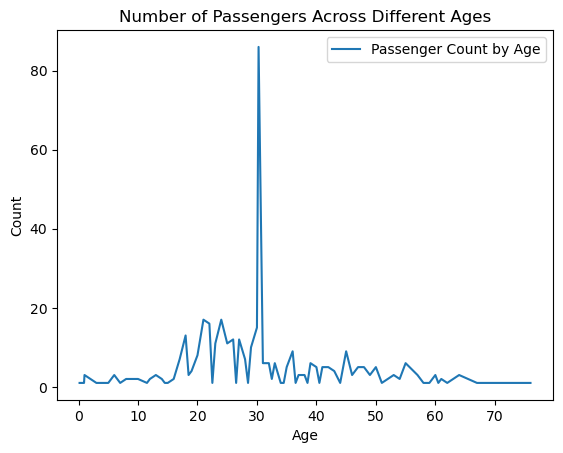

In [27]:
import matplotlib.pyplot as plt

#  line plot
age_counts = df['Age'].value_counts().sort_index()
plt.plot(age_counts.index, age_counts.values, label='Passenger Count by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Number of Passengers Across Different Ages')
plt.legend()
plt.show()

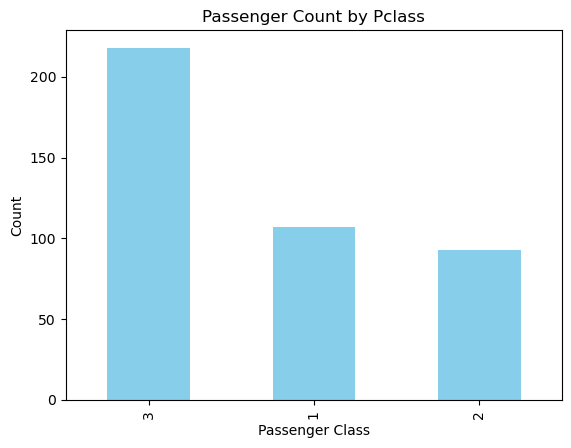

In [26]:
#Bar plot
Passenerclass_counts = df['Pclass'].value_counts()

Passenerclass_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Passenger Count by Pclass')
plt.show()

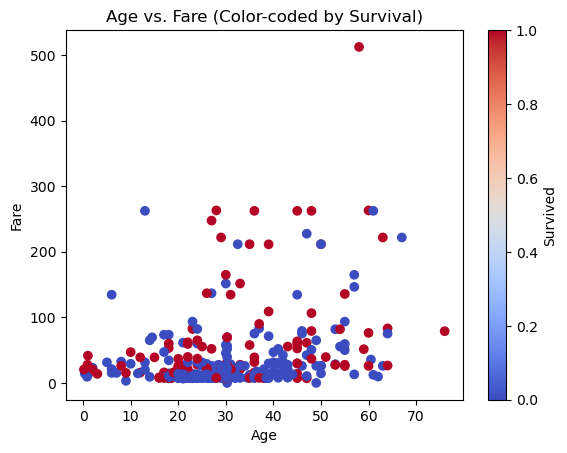

In [31]:
#scatter plot
scatter = plt.scatter(df['Age'], df['Fare'], c=df['Survived'], cmap='coolwarm', alpha=0.7)
plt.colorbar(scatter, label='Survived')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs. Fare (Color-coded by Survival)')
plt.show()

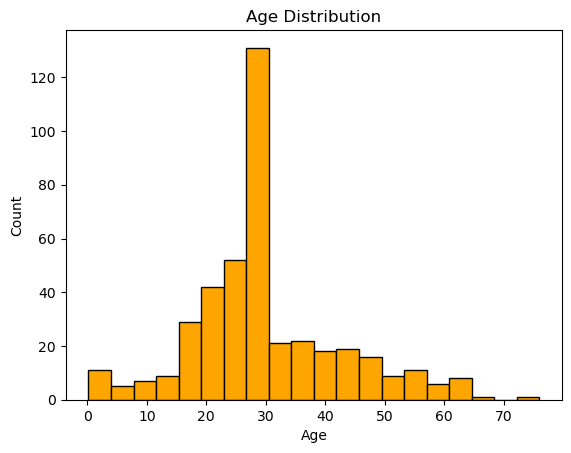

In [32]:
#Histogram
df['Age'].plot(kind='hist', bins=20, color='orange', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()


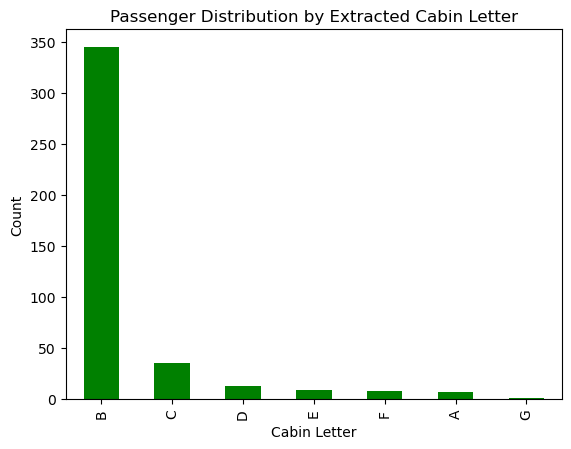

In [35]:
#Bar for extract cabin features
cabin_counts.plot(kind='bar', color='green')
plt.xlabel('Cabin Letter')
plt.ylabel('Count')
plt.title('Passenger Distribution by Extracted Cabin Letter')
plt.show()

Step 7: Insights
Based on the analysis and visualizations, here are the key insights:

1. Passengers by Class (Pclass):
Insight: Most passengers belonged to the third class, followed by the second class, and then the first class. This suggests that the third class was the most affordable and likely had the largest group of passengers.
2. Age Distribution:
Insight: The majority of passengers were in the 20–40 age group, indicating that the ship carried many adults and younger individuals.
3. Age vs. Fare Relationship:
Insight: Older passengers occasionally paid higher fares, suggesting that they may have opted for better accommodations. Most younger passengers paid lower fares, likely due to traveling in lower classes.
4. Extracted Cabin Letters:
Insight: Many passengers had missing cabin information, classified as "Missing." Among those with cabin data, letters such as "C" and "D" were more common, particularly among survivors.
5. Survival Trends:
Insight: Survival rates were higher among passengers in the first and second classes, as well as those with non-missing cabin data. There was also a noticeable correlation between higher fares and higher survival rates.
Summary:
Key factors influencing survival include class (Pclass), fare (Fare), and cabin information (Cabin).
Visualizations provided clear insights into passenger demographics, survival trends, and correlations between features.